In [11]:
import pandas as pd
import numpy as ns
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
data = pd.read_csv("Details.csv")

In [3]:
data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [4]:
data.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD
1499,B-25993,4363,305,5,Furniture,Tables,EMI


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [6]:
data.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [7]:
data.isnull()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False


In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [9]:
data.value_counts()

Order ID  Amount  Profit  Quantity  Category     Sub-Category      PaymentMode
B-25601   8       -2      3         Clothing     Hankerchief       Credit Card    1
B-25943   137      38     5         Clothing     Hankerchief       Debit Card     1
B-25947   207      33     2         Electronics  Accessories       UPI            1
B-25946   146      7      2         Electronics  Phones            Debit Card     1
B-25945   765     -36     3         Electronics  Electronic Games  COD            1
                                                                                 ..
B-25765   139      14     3         Clothing     Stole             COD            1
B-25764   765     -153    2         Electronics  Phones            Debit Card     1
          349     -24     2         Clothing     Saree             Debit Card     1
          119      43     5         Clothing     T-shirt           COD            1
B-26100   828      230    2         Furniture    Chairs            COD           

In [14]:
remove_null = data.dropna()
remove_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [15]:
sorting_asc= remove_null.sort_values(by=['Category'])
sorting_asc.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
749,B-26054,88,20,2,Clothing,Saree,COD
1178,B-26075,34,12,2,Clothing,Stole,COD
679,B-25896,103,36,2,Clothing,Hankerchief,COD
680,B-25796,37,-6,1,Clothing,Saree,UPI
681,B-25934,105,33,6,Clothing,Saree,EMI


In [19]:
def clean_tag(tag):
    if isinstance(tag,str):
        tag = tag.strip().lower()
        return tag

In [20]:
sorting_asc["Category"]=sorting_asc['Category'].apply(clean_tag)

In [26]:
sorting_asc["Sub-Category"]=sorting_asc['Sub-Category'].apply(clean_tag)

In [27]:
sorting_asc

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
749,B-26054,88,20,2,clothing,saree,COD
1178,B-26075,34,12,2,clothing,stole,COD
679,B-25896,103,36,2,clothing,hankerchief,COD
680,B-25796,37,-6,1,clothing,saree,UPI
681,B-25934,105,33,6,clothing,saree,EMI
...,...,...,...,...,...,...,...
1235,B-25750,539,-146,7,furniture,furnishings,Debit Card
515,B-25699,20,-22,1,furniture,furnishings,UPI
521,B-25983,161,-229,8,furniture,furnishings,COD
472,B-26097,185,-26,6,furniture,chairs,COD


array([[<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Profit'}>],
       [<Axes: title={'center': 'Quantity'}>, <Axes: >]], dtype=object)

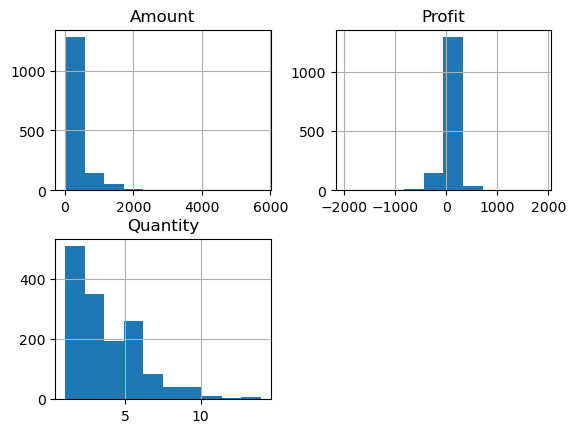

In [17]:
data.hist()

<Axes: >

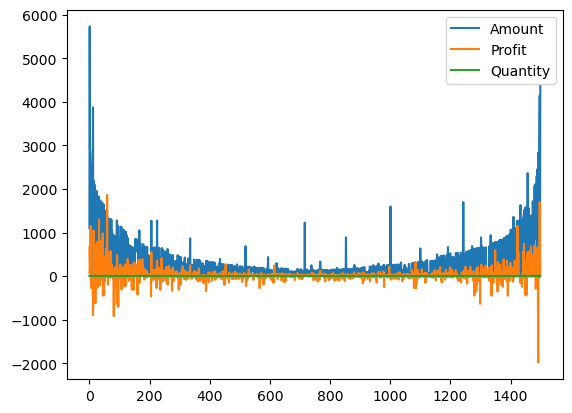

In [18]:
data.plot()

<Axes: >

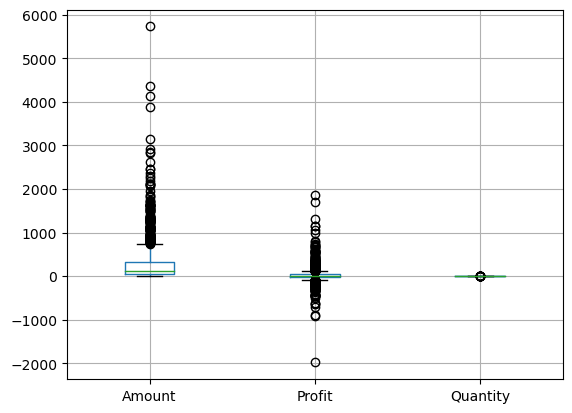

In [19]:
data.boxplot()

C:\Users\Acs\AppData\Local\Temp\ipykernel_9432\3685042537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot=True)


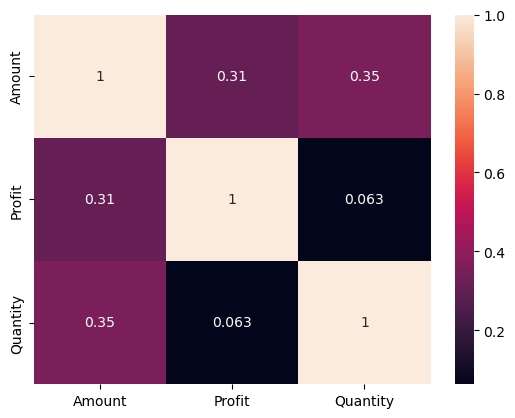

In [22]:
ax = sns.heatmap(data.corr(),annot=True)
plt.show()

C:\Users\Acs\AppData\Local\Temp\ipykernel_9432\3580096955.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.cov(),annot=True)


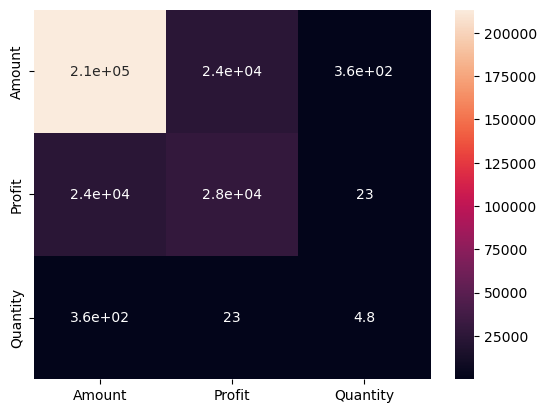

In [24]:
ax = sns.heatmap(data.cov(),annot=True)
plt.show()

In [25]:
data =pd.read_csv("Orders.csv")

In [27]:
data.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [28]:
data.tail()

,Order ID,Order Date,CustomerName,State,City
495,B-25742,03-08-2018,Ashwin,Goa,Goa
496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok
497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai
498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla
499,B-26095,28-03-2018,Monisha,Rajasthan,Jaipur


In [29]:
data.isnull()

,Order ID,Order Date,CustomerName,State,City
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
495,False,False,False,False,False
496,False,False,False,False,False
497,False,False,False,False,False
498,False,False,False,False,False


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [31]:
data.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,336,19,25
top,B-26055,24-11-2018,Shreya,Maharashtra,Indore
freq,1,7,6,94,71


In [32]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool